In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
## for 1 hot encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

## imports for Multi Layer Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
df = pd.read_csv('Iris.csv')
df
X = df.drop(['Species', 'Id'], axis=1)
y = df['Species']

# label encoder here
label = LabelEncoder()
y = label.fit_transform(y)

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# task, i am required to design a mulitlayer perceptron MLP model to classify the species of iris flowers based on these features
# by using a good optimizer and loss function

# define MLP model

model = Sequential([
    Dense(10, activation = 'relu', input_shape = (4,)),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

In [24]:
# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc:}")

# Evaluate on testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing Accuracy: {test_acc:}")

Training Accuracy: 0.949999988079071
Testing Accuracy: 1.0


In [25]:
# ploting confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
y_pred_probs = model.predict(X_test)

# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
# y_true = np.argmax(y_test, axis=1) # This line caused the error
y_true = y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [29]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label.classes_))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



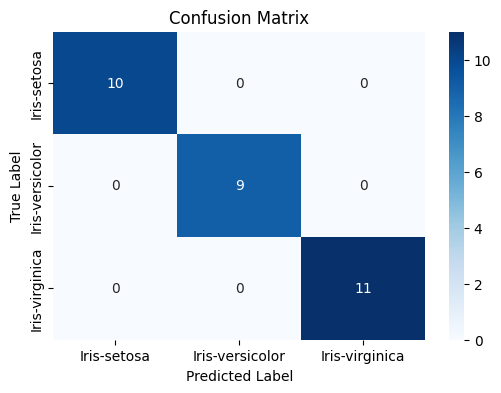

In [32]:
# Compute confusion matrix
matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label.classes_,
            yticklabels=label.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()